Saving titanic_cleaned.csv to titanic_cleaned (9).csv
Dataset loaded. Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:43:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 0.7932960893854749


/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:254: FutureWarning: In the future, passing feature_perturbation='interventional' without providing a background dataset will raise an error. Please provide a background dataset to continue using the interventional approach or set feature_perturbation='auto' to automatically switch approaches.
  warnings.warn(


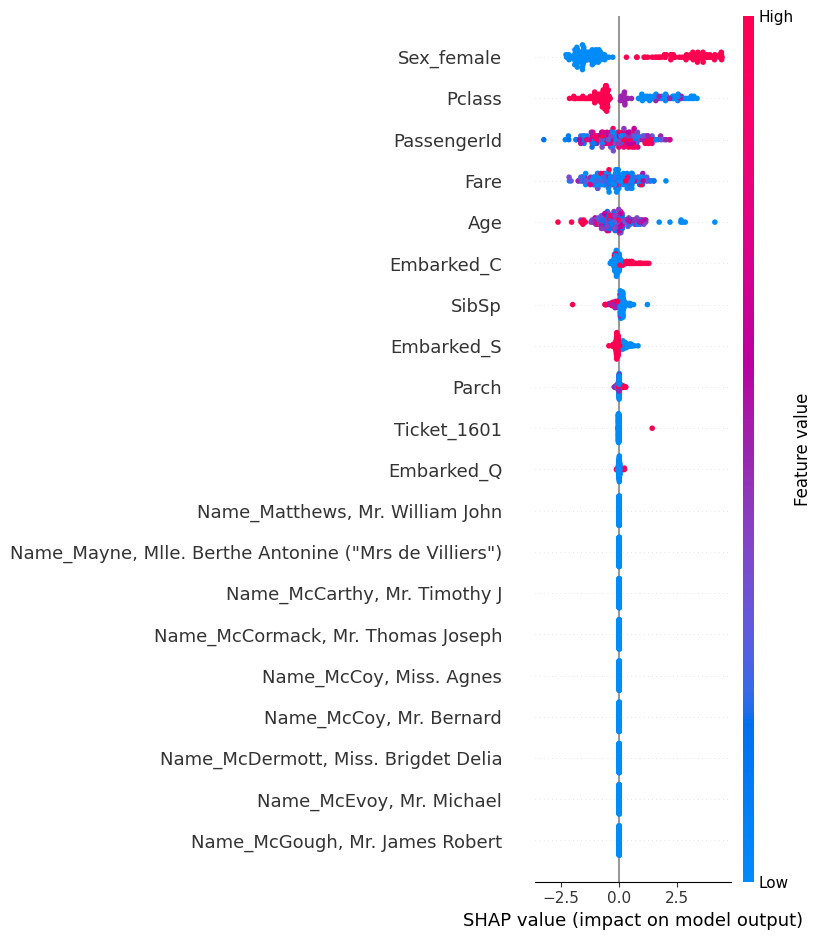

In [10]:
# 1. Upload Titanic CSV
from google.colab import files
uploaded = files.upload()  # select 'titanic_cleaned.csv'

import pandas as pd
import io
data = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))
print("Dataset loaded. Columns:", data.columns)

# 2. Features & target
X = data.drop("Survived", axis=1)
y = data["Survived"]
X = pd.get_dummies(X)

# 3. Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. XGBoost Classifier
!pip install xgboost shap --quiet
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Evaluate
accuracy = model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

# 5. SHAP Explainability
import shap

explainer = shap.TreeExplainer(model, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

# Summary plot (stable, error-free)
shap.summary_plot(shap_values, X_test)

# Optional: force plot for first instance
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0])



